### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. In the original paper, the dataset was used for a classification problem -- predicting whether or not a client has subscribed to a term deposit based on features including bank client data, data about the marketing campaigns, and some socioeconomic data.



### Objective

 we use the bank client data to try and cluster bank clients into different groups. Such analysis may be important to banking institutions in designing marketing campaigns, as an understanding of different client groups may help banks to develop different marketing campaigns target towards each group of clients, which may potentially be be more effective than a universal marketing campaign for all clients.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv(r"C:\Users\Srinath\Desktop\Datasets\bank_data.csv")

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Taking only Bank client data

In [5]:
data = df.iloc[:,:8]

data

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no
11158,39,services,married,secondary,no,733,no,no
11159,32,technician,single,secondary,no,29,no,no
11160,43,technician,married,secondary,no,0,no,yes


In [6]:
data.shape

(11162, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
dtypes: int64(2), object(6)
memory usage: 697.8+ KB


In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [9]:
data.describe()

,age,balance
count,11162.000000,11162.000000
mean,41.231948,1528.538524
std,11.913369,3225.413326
min,18.000000,-6847.000000
25%,32.000000,122.000000
50%,39.000000,550.000000
75%,49.000000,1708.000000
max,95.000000,81204.000000


In [10]:
#Rename columns based on our convenient to understand features

data.rename(columns ={'default':'credit_default'},inplace= True)
data.rename(columns ={'housing':'housing_loan'},inplace= True)
data.rename(columns ={'loan':'personal_loan'},inplace= True)

In [11]:
data

,age,job,marital,education,credit_default,balance,housing_loan,personal_loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no
11158,39,services,married,secondary,no,733,no,no
11159,32,technician,single,secondary,no,29,no,no
11160,43,technician,married,secondary,no,0,no,yes


In [12]:
# Feature with one value:

for column in data:
    print(column,data[column].nunique())
# so no feature has one values

age 76
job 12
marital 3
education 4
credit_default 2
balance 3805
housing_loan 2
personal_loan 2


In [13]:
# Print the Categorical feature and its unique Categories

for col in data.select_dtypes(include= 'object'):
    print(col)
    print(data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
credit_default
['no' 'yes']
housing_loan
['yes' 'no']
personal_loan
['no' 'yes']


In [14]:
# Print the Categorical feature and its Number of unique values

for col in data.select_dtypes(include= 'object'):
    print("The categorial feature {} has {} categories".format(col,data[col].nunique()))

The categorial feature job has 12 categories
The categorial feature marital has 3 categories
The categorial feature education has 4 categories
The categorial feature credit_default has 2 categories
The categorial feature housing_loan has 2 categories
The categorial feature personal_loan has 2 categories


### categorical_feature

In [15]:
categorical_feature = [x for x in data.columns if (data[x].dtype =='object')]

categorical_feature

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan']

### Findings


* There is no missing values in the dateset
* There is no unwanted columns in the data set and there is no feature with one value so we can keep all the features for analysis.
* There are 6 catergorical feature.
* Categorical feature job and education in the data is heighest number of category.


##### Categorial feature Distribution

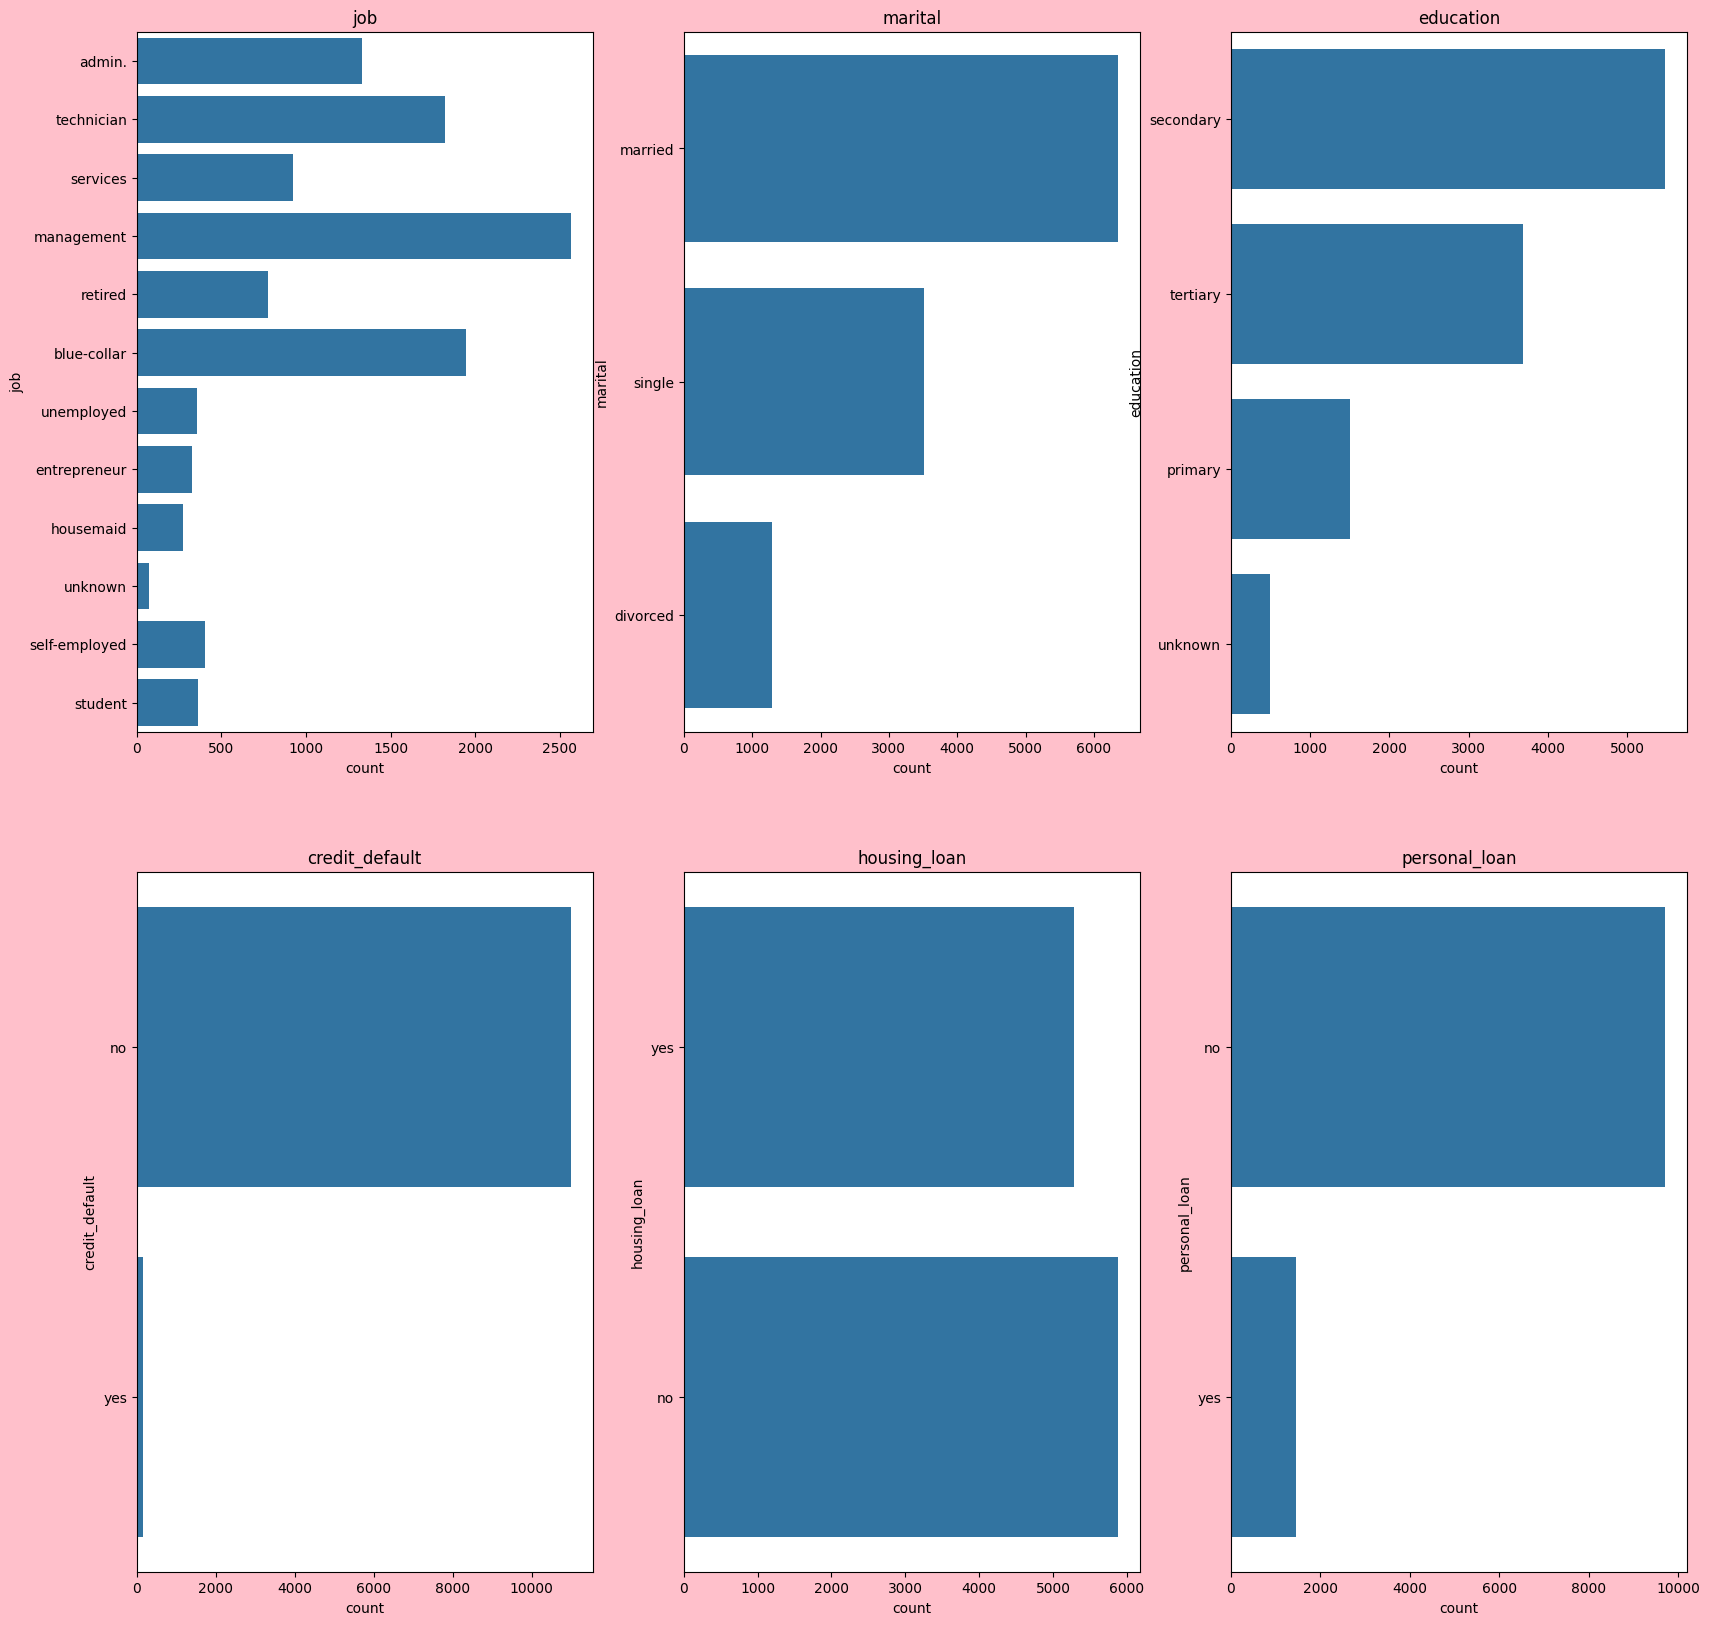

In [16]:
plt.figure(figsize=(20,20),facecolor= 'pink')
plotnumber=1
for feature in categorical_feature:
    plt.subplot(2,3,plotnumber)
    sns.countplot(data=data,y=feature)
    plt.title(feature)
    plotnumber+=1

plt.show()

### Findings

* The person whose job type is managerment has been contacted more and the person whose job type is house maid has been contacted the least.
* Married persons have been contacted more and the divorced person has been contacted the least.
* The person whose education background is secondary are in high numbers in the given dataset.
* Default feature seems to be does not play important role as it has value of "No" at high ratio than yes, so we can drop
* Mostly the person with no credit & personal loan has been contacted.

### numerical_feature

In [17]:
numerical_feature = [x for x in data.columns if (data[x].dtype!='object')]

numerical_feature

['age', 'balance']

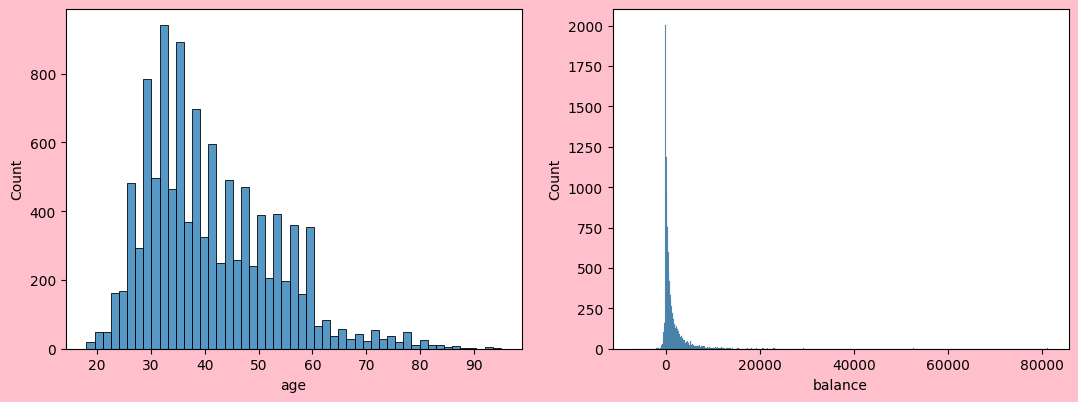

In [18]:
# Distribution of  Numerical features

plt.figure(figsize= (20,15),facecolor='pink')
plotnumber = 1
for feature in numerical_feature:
    plt.subplot(3,3,plotnumber)
    sns.histplot(data[feature])
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()

### Find Outliers in numerical features

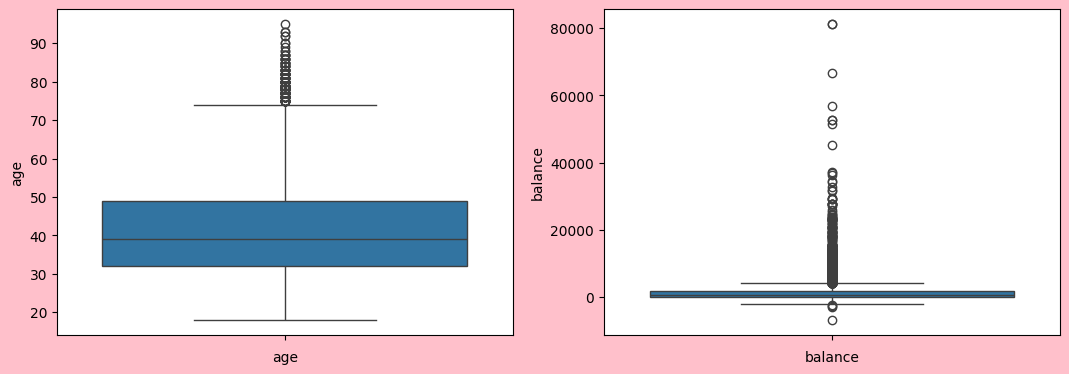

In [19]:


# boxplot on numerical features to find outliers:

plt.figure(figsize= (20,60),facecolor= 'pink')
plotnumber =1
for feature in numerical_feature:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(data, y =feature)
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()

Making Negative Balance to one

In [20]:
# data["balance"]= [i if i>=2 else 1 for i in data['balance']]

In [21]:
def detect_negative_value(data):
    outlier = []
    for i in data:
        if i>=2:
            i = i
        else:
            i = 1
        outlier.append(i)
    return outlier

In [22]:
data['balance'] = detect_negative_value(data["balance"])

### K-Modes algorithm 

Since our data is mostly categorical, the K-Means algorithm, which calculates the Euclidean distance from the cluster centers to each datapoint, is likely to not produce a good clustering, since the Euclidean distance between cluster centers and categorical features, which have been one-hot encoded and therefore take either 0 or 1 as values, does not make much sense. The K-Modes algorithm is a modification of K-Means more suited for categorical data. Instead of calculating the Euclidean distance between the datapoints and cluster centers, in K-Modes, a dissimilarity measure is used, which is defined as the number of features of the datapoint whose values do not match those of the cluster center. Also, the cluster centers are updated using the mode of the datapoints assigned to each cluster, instead of the mean.


Below, we turn age and balance into categorical variables by binning them, and one-hot encode all the categorical variables. We then implement the K-Modes algorithm for 1 to 11 clusters. We then produce plots of the cost for each number of clusters. The cost of the K-Modes algorithm is defined as the sum of the dissimilarities of each datapoint.

In [23]:
numerical_feature

['age', 'balance']

### Before changing age and balance

In [24]:
data

,age,job,marital,education,credit_default,balance,housing_loan,personal_loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no
11158,39,services,married,secondary,no,733,no,no
11159,32,technician,single,secondary,no,29,no,no
11160,43,technician,married,secondary,no,1,no,yes


After Changing age and Balance to New_age and Balance

In [25]:
data['new_age'] = pd.cut(x = data['age'],bins =[10,20,30,40,50,60,70,80,90,100],labels=['11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']).astype('object')

data['new_balance'] = pd.cut(x = data['balance'],bins =[0, 1000,5000, 10000, 20000, 50000, 100000],labels =['1-1000','1001-5000','5001-10000','10001-20000','20001-50000','50001-100000']).astype('object')


data.drop(columns= ['age','balance'],axis = 1,inplace= True)

data

,job,marital,education,credit_default,housing_loan,personal_loan,new_age,new_balance
0,admin.,married,secondary,no,yes,no,51-60,1001-5000
1,admin.,married,secondary,no,no,no,51-60,1-1000
2,technician,married,secondary,no,yes,no,41-50,1001-5000
3,services,married,secondary,no,yes,no,51-60,1001-5000
4,admin.,married,tertiary,no,no,no,51-60,1-1000
...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,31-40,1-1000
11158,services,married,secondary,no,no,no,31-40,1-1000
11159,technician,single,secondary,no,no,no,31-40,1-1000
11160,technician,married,secondary,no,no,yes,41-50,1-1000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job             11162 non-null  object
 1   marital         11162 non-null  object
 2   education       11162 non-null  object
 3   credit_default  11162 non-null  object
 4   housing_loan    11162 non-null  object
 5   personal_loan   11162 non-null  object
 6   new_age         11162 non-null  object
 7   new_balance     11162 non-null  object
dtypes: object(8)
memory usage: 697.8+ KB


### One Hot Encoding

In [29]:
data_K = pd.get_dummies(data, drop_first=True)

data_K


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,credit_default_yes,housing_loan_yes,personal_loan_yes,new_age_21-30,new_age_31-40,new_age_41-50,new_age_51-60,new_age_61-70,new_age_71-80,new_age_81-90,new_age_91-100,new_balance_10001-20000,new_balance_1001-5000,new_balance_20001-50000,new_balance_50001-100000,new_balance_5001-10000
0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False


In [28]:
pd.set_option('display.max_columns',None)

# Encoding

### one_hot_encoding

In [27]:
# nominal_data= ['job','education','new_age','new_balance']

# nominal_data

In [28]:
# for nom in nominal_data:
#     data = pd.concat([data,pd.get_dummies(data[nom],prefix=nom,dtype = int,drop_first = True)],axis=1)
#     data.drop(nom,axis=1,inplace= True)

In [29]:
# data

### Label_Encoding

In [30]:
# ordinal_data = ['marital','housing_loan','personal_loan','credit_default']

In [31]:
# encoder = LabelEncoder()

# for i in ordinal_data:
#     encoder.fit(data[i])
#     data[i] = encoder.transform(data[i])

# data

#centroid find - Huang

In [32]:
wcss =[]   # Within-Cluster Sum of Square 

for i in range(1,11):
    k_mode = KModes(i,init= 'Huang',random_state= 42)
    k_mode.fit(data_K)

    wcss.append(k_mode.cost_)

### Plot Elbow Graph

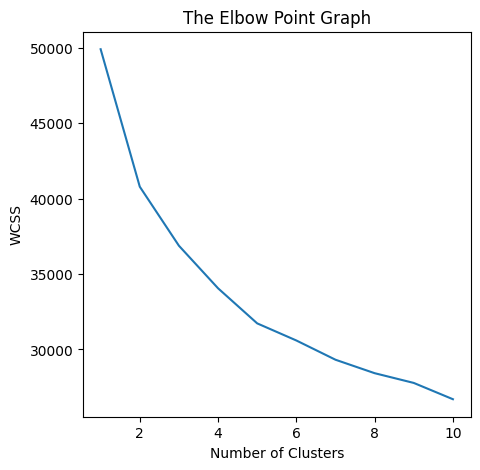

In [33]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

In [34]:
# Optimum number of cluster is 5

k_mode = KModes(5,init= 'Huang',random_state= 42)
data["cluster_k_mode"]=k_mode.fit_predict(data_K)

data

,job,marital,education,credit_default,housing_loan,personal_loan,new_age,new_balance,cluster_k_mode
0,admin.,married,secondary,no,yes,no,51-60,1001-5000,3
1,admin.,married,secondary,no,no,no,51-60,1-1000,2
2,technician,married,secondary,no,yes,no,41-50,1001-5000,2
3,services,married,secondary,no,yes,no,51-60,1001-5000,3
4,admin.,married,tertiary,no,no,no,51-60,1-1000,4
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,31-40,1-1000,0
11158,services,married,secondary,no,no,no,31-40,1-1000,3
11159,technician,single,secondary,no,no,no,31-40,1-1000,0
11160,technician,married,secondary,no,no,yes,41-50,1-1000,2


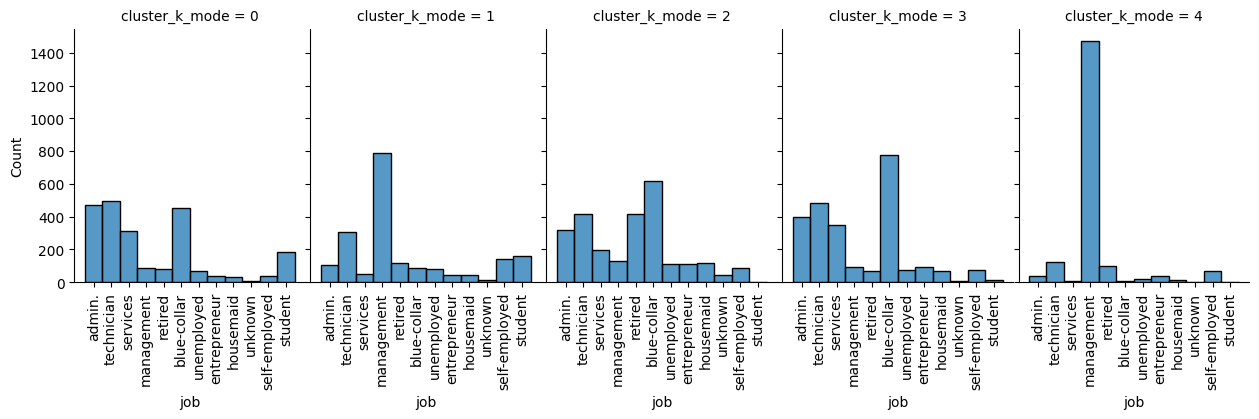

In [35]:
plot1 = sns.displot(data=data, x='job', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In cluster 0 The most of the clients are working as technician and admin & blue_collar.
- In cluster 1 The most of the clients are working in Management and next would be technician.
- In cluster 2 The most of the clients are working in blue_collar and secondary would be technician and some retired.
- In cluster 3, majority of the clients are working in blue_collar and secondary would be technician and admin roles.
- In cluster 4, The majority of the clients are working in management roles.


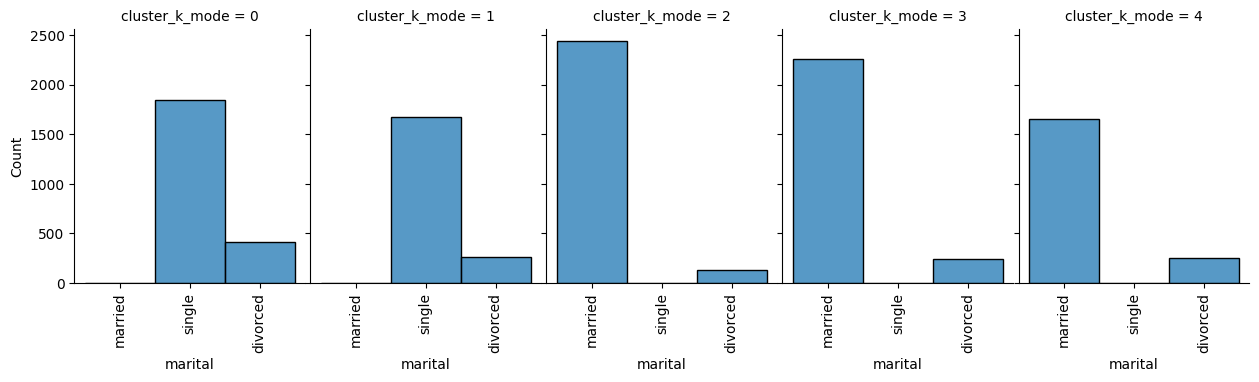

In [36]:
plot1 = sns.displot(data=data, x='marital', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In cluster 0 The most of the clients are single.
- In cluster 1 The most of the clients are single.
- In cluster 2 The most of the clients are married.
- In cluster 3 The most of the clients are married.
- In cluster 4 The most of the clients are married.


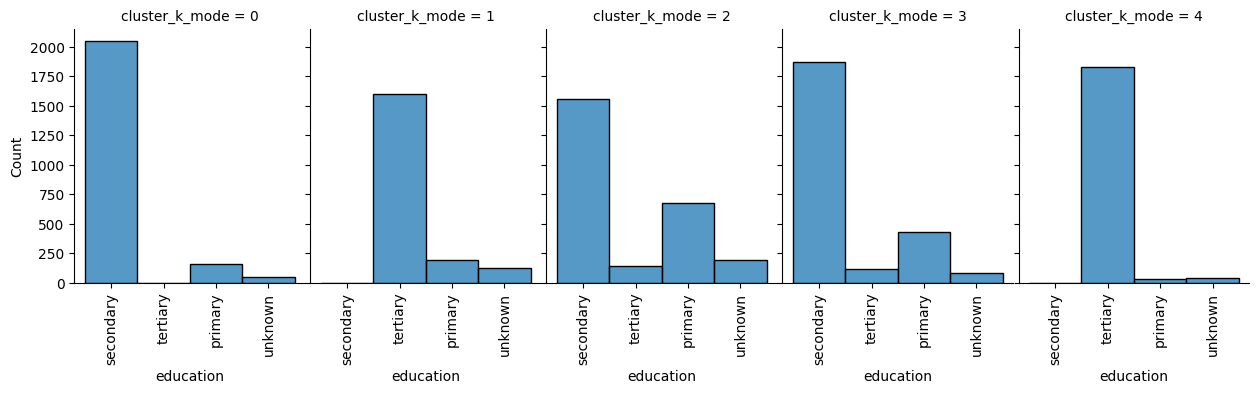

In [37]:
plot1 = sns.displot(data=data, x='education', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In cluster 0 The most of the clients has secondary degree.
- In cluster 1 The most of the clients has tertitary degree.
- In cluster 2 The most of the clients has secondary degree.
- In cluster 3 The most of the clients has secondary degree.
- In cluster 4 The most of the clients has tertitary degree.


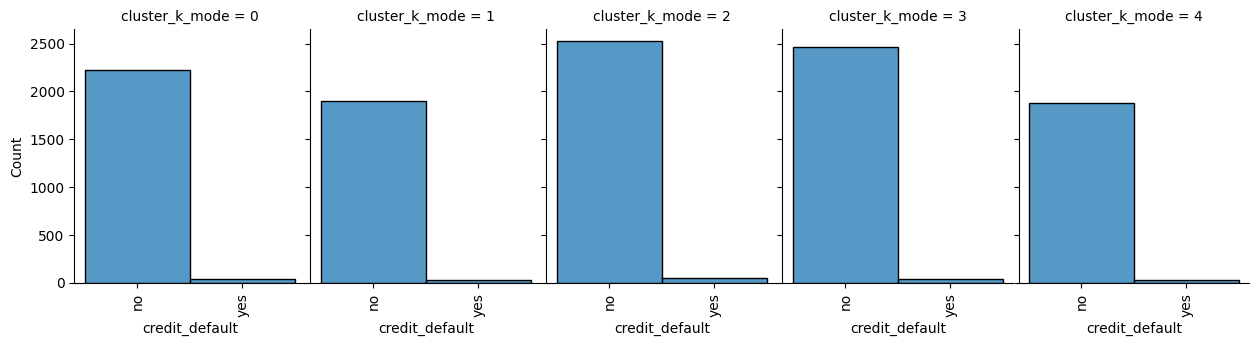

In [38]:
plot1 = sns.displot(data=data, x='credit_default', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In all the clusters, the most of the clients has no credits.

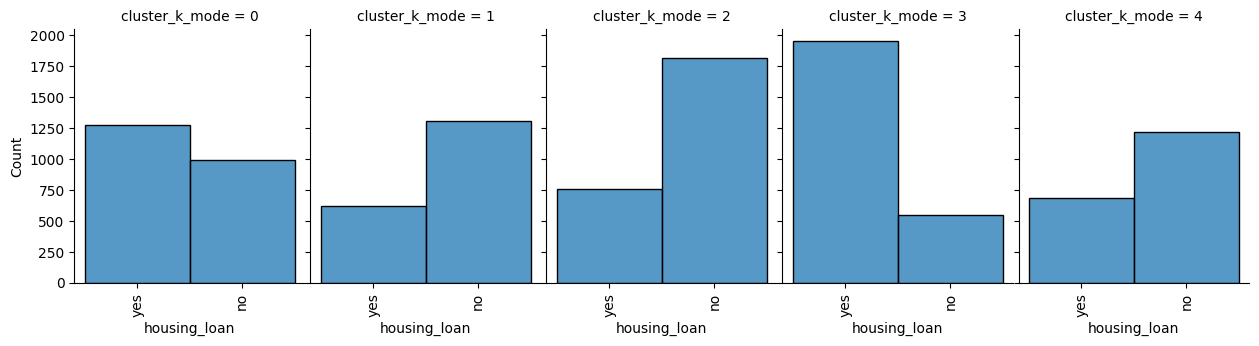

In [39]:
plot1 = sns.displot(data=data, x='housing_loan', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In cluster 0 The most of the clients has housing loan.
- In cluster 1 The most of the clients has no housing loan.
- In cluster 2 The most of the clients has no housing loan.
- In cluster 3 The most of the clients has housing loan.
- In cluster 4 The most of the clients has no housing loan.

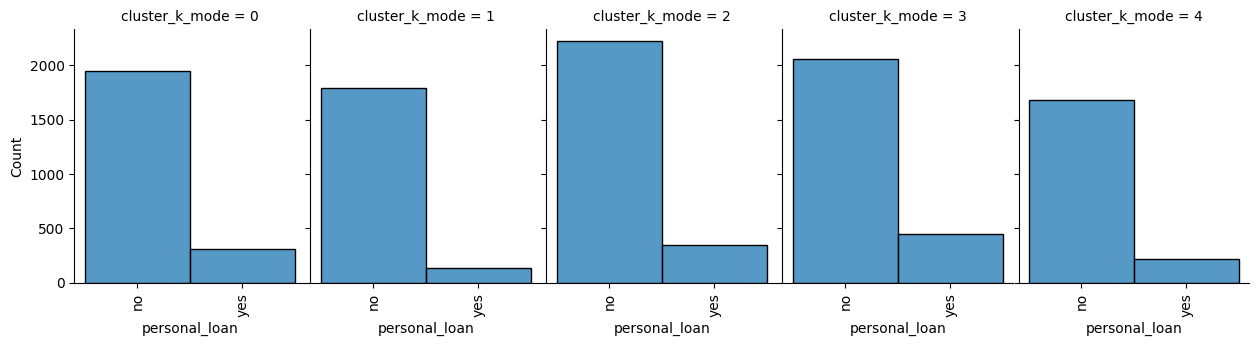

In [40]:
plot1 = sns.displot(data=data, x='personal_loan', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In all the clusters, the most of the clients has no peronal loan.

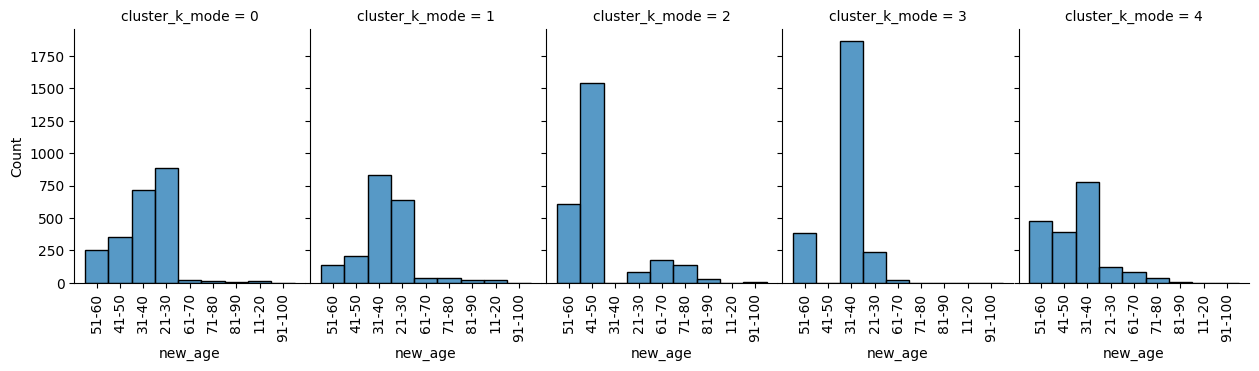

In [41]:
plot1 = sns.displot(data=data, x='new_age', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In cluster 0 The most of the clients are belongs to the age category of 21 - 30.
- In cluster 1 The most of the clients are belongs to the age category of 31 - 40
- In cluster 2 The most of the clients are belongs to the age category of 41 - 60
- In cluster 3 The most of the clients are belongs to the age category of 31 - 40
- In cluster 4 The most of the clients are belongs to the age category of 31 - 60

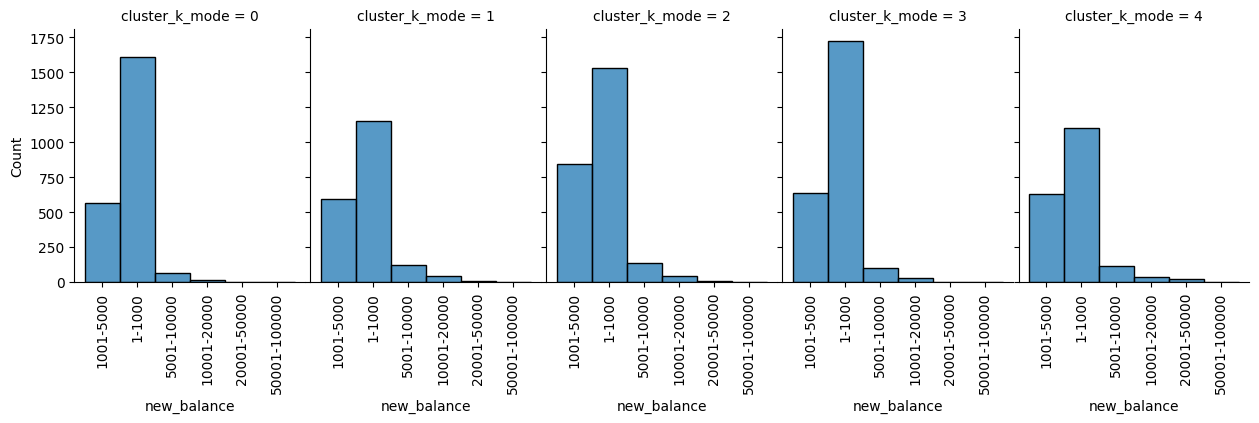

In [42]:
plot1 = sns.displot(data=data, x='new_balance', col='cluster_k_mode', height=6, aspect=1.5)
plot1.set_xticklabels(rotation=90)

# Adjust the figure size
plot1.figure.set_size_inches(12,3)

plt.show()

- In all the clusters clients has balance of 1-1000 and 1001-5000

### Take away:

Cluster 0:

Occupations: Mostly technicians, admins, and blue-collar workers.
Marital Status: Mostly single clients.
Education: Mostly have a secondary degree.
Housing Loans: Mostly have housing loans.
Age Category: Mostly aged 21-30.

Cluster 1

Occupations: Mainly management, followed by technicians.
Marital Status: Mostly single clients.
Education: Mostly have a tertiary degree.
Housing Loans: Mostly do not have housing loans.
Age Category: Mostly aged 31-40.


Cluster 2

Occupations: Predominantly blue-collar, with some technicians and retirees.
Marital Status: Mostly married clients.
Education: Mostly have a secondary degree.
Housing Loans: Mostly do not have housing loans.
Age Category: Mostly aged 41-60.

Cluster 3

Occupations: Mainly blue-collar, followed by technicians and admins.
Marital Status: Mostly married clients.
Education: Mostly have a secondary degree.
Housing Loans: Mostly have housing loans.
Age Category: Mostly aged 31-40.

Cluster 4
Occupations: Primarily management roles.
Marital Status: Mostly married clients.
Education: Mostly have a tertiary degree.
Housing Loans: Mostly do not have housing loans.
Age Category: Mostly aged 31-60.


Common Attributes Across All Clusters:

Balances between 1-1000 and 1001-5000.
Most of the clients has no personal loans and credits.

### Recommendations:



Not Interested:

- Cluster 4 clients generally have high incomes, attributed to their jobs, education, and years of experience. Given their background, they likely already have a Term Deposit and might not be interested in another.

Interested:

- Cluster 0 clients, being younger than those in other clusters, have a solid educational foundation, making them potential candidates for a Term Deposit. We can easily convince them by highlighting the future interest rates or lump sum amounts they could earn.

- Cluster 3 clients are in the mid-age category, working in blue-collar jobs, or as technicians and administrators. They have the basic qualifications to understand the concept of a Term Deposit, and we can also persuade them by showing potential future interest rates or lump sum amounts.



Recommendations-  Based on analysis,the Bank should target Cluster 0 and Cluster 3 clients for Bank term Deposit. This could make the marketing campaign more effective as well as reduce costs of the marketing campaign.